Principal Component Analysis (PCA)

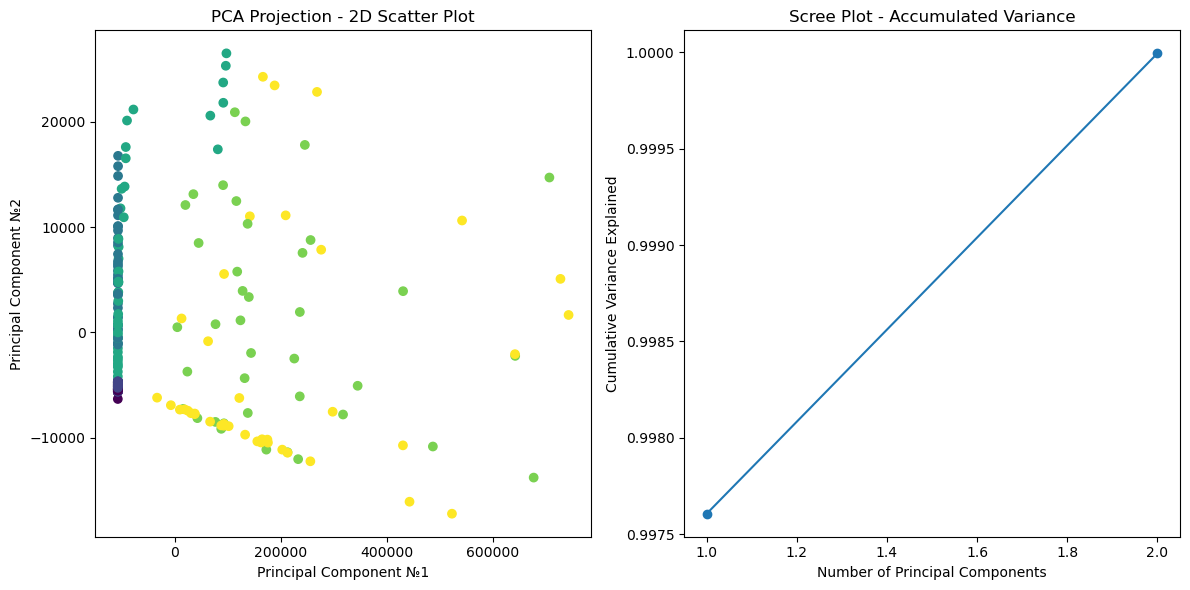

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Read data from the file
your_internet_data = pd.read_csv('6 class.csv')

# Rename columns to English names
your_internet_data.columns = ['Temperature', 'Luminosity', 'Radius', 'Absolute magnitude', 'Star type', 'Star color', 'Spectral Class']

# Convert categorical values into numerical using One-Hot Encoding
your_internet_data = pd.get_dummies(your_internet_data, columns=['Star color', 'Spectral Class'])

# Saving the 'Star type' column for coloring in the plot
labels = your_internet_data['Star type']

# Dropping the 'Star type' column for PCA
your_internet_data = your_internet_data.drop(['Star type'], axis=1)

pca = PCA(n_components=2)  # Creating a PCA instance specifying two components for analysis

# Transform the data using PCA
pca_result = pca.fit_transform(your_internet_data)

# Visualize PCA projection in two dimensions
plt.figure(figsize=(12, 6))

# Scatter plot of the first two principal components
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title('PCA Projection - 2D Scatter Plot')
plt.xlabel('Principal Component №1')
plt.ylabel('Principal Component №2')

# Scree plot with the accumulated variance
plt.subplot(1, 2, 2)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Scree Plot - Accumulated Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')

plt.tight_layout()
plt.show()


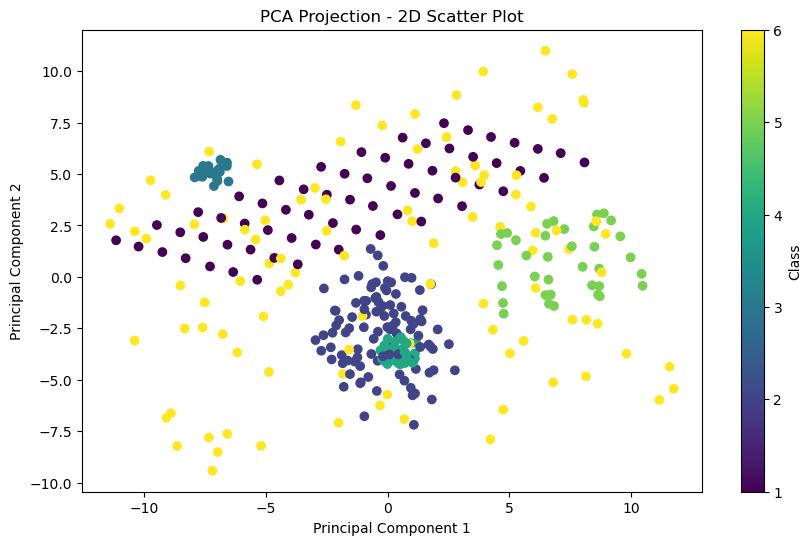

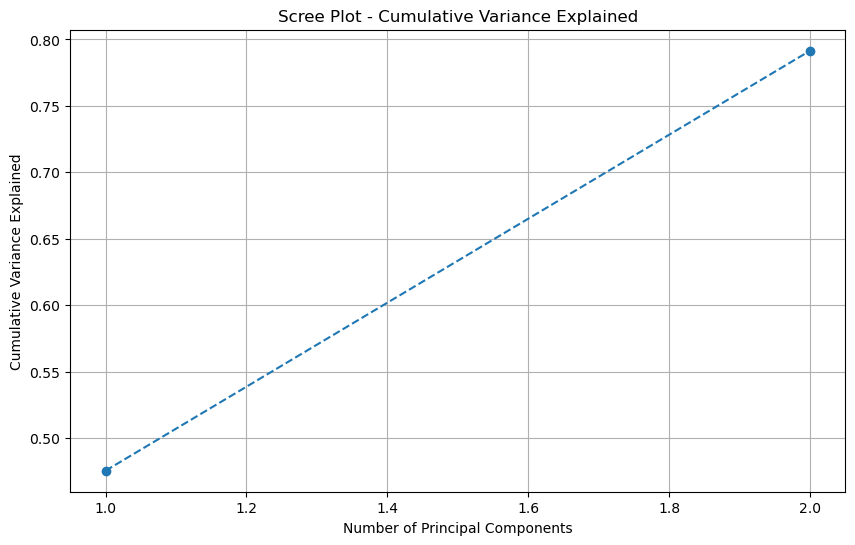

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('A3-data.txt')

# Extract the class labels
labels = data['class']

# Extract the features (drop the class column for PCA)
features = data.drop('class', axis=1)

# Perform One-Hot Encoding if needed for categorical columns


# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title('PCA Projection - 2D Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

# Create a scree plot with the explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot - Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()


t-distributed Neighbor Stochastic Embedding (t-SNE)

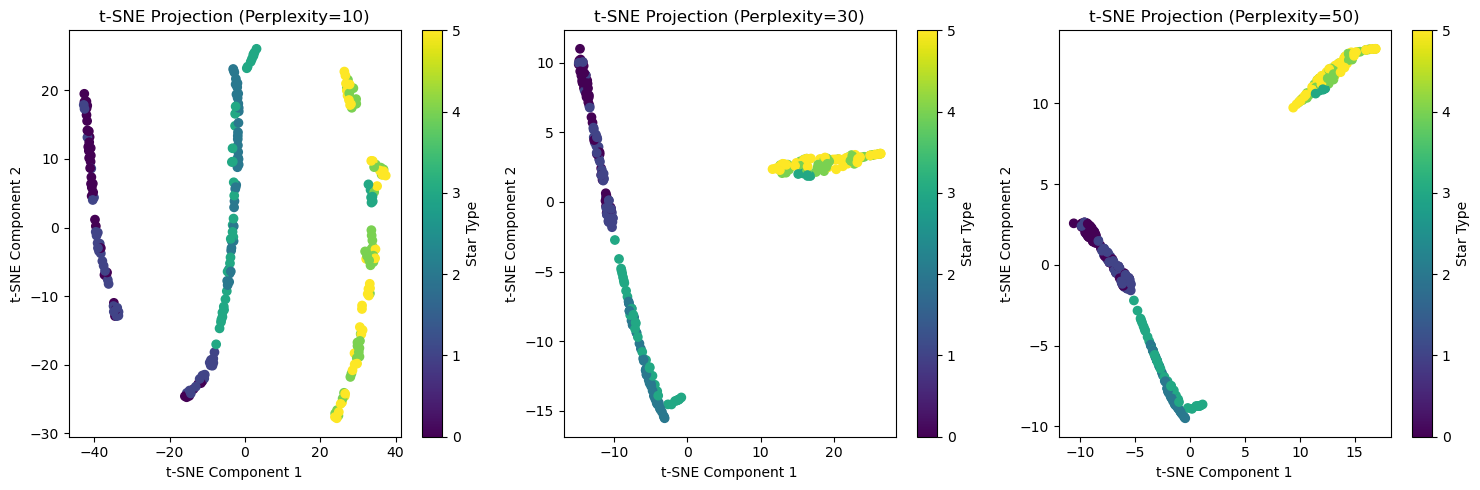

In [18]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the dataset
data1 = pd.read_csv('6 class.csv')

# Extract the class labels
labels1 = data1['Star type']

# Extract the features (drop the class label column for t-SNE)
features1 = data1.drop('Star type', axis=1)

# Perform One-Hot Encoding for the 'Star color' and 'Spectral Class' columns
features1 = pd.get_dummies(features1, columns=['Star color', 'Spectral Class'])

# Perform t-SNE with 2 components and different parameters (e.g., perplexity)
perplexities = [10, 30, 50]  # Example perplexity values
plt.figure(figsize=(15, 5))

for i, perplexity in enumerate(perplexities):
    tsne1 = TSNE(n_components=2, perplexity=perplexity)
    tsne_result1 = tsne1.fit_transform(features1)
    
    # Create a scatter plot of the t-SNE projection with different colors for each class
    plt.subplot(1, len(perplexities), i + 1)
    plt.scatter(tsne_result1[:, 0], tsne_result1[:, 1], c=labels1, cmap='viridis')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Star Type')

plt.tight_layout()
plt.show()


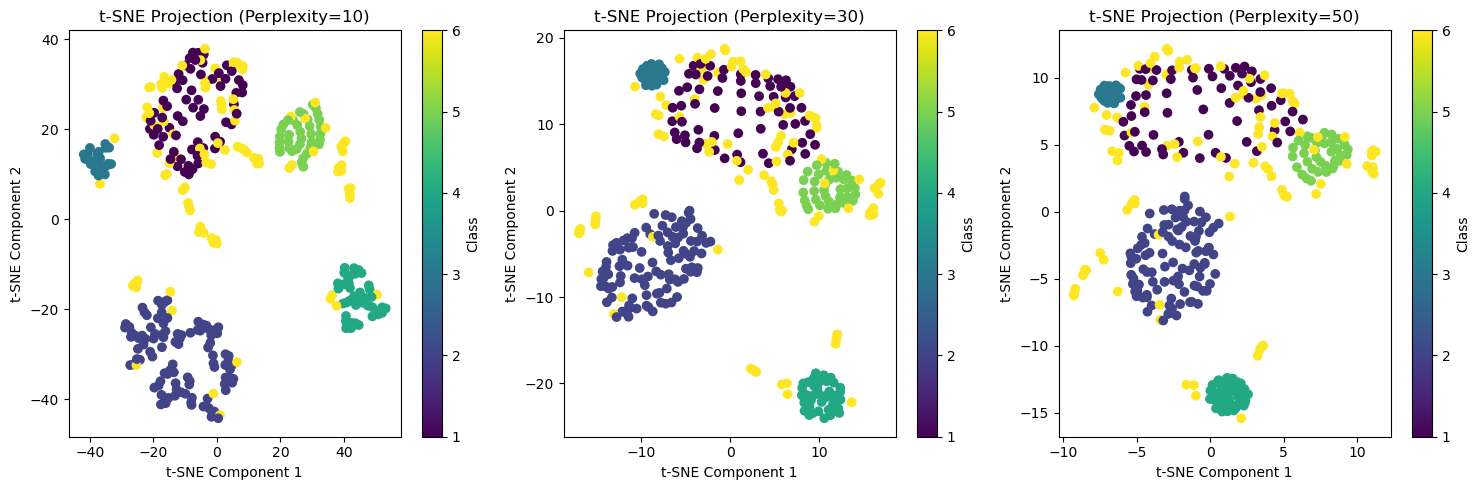

In [20]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the dataset while skipping the header (first row)
data2 = pd.read_csv('A3-data.txt', sep=',', header=0)

# Extract the class labels (assuming the class is in the last column)
labels2 = data2.iloc[:, -1]

# Extract the features (drop the class column for t-SNE)
features2 = data2.iloc[:, :-1]

# Perform t-SNE with 2 components and different parameters (e.g., perplexity)
# You can experiment with different perplexity values
perplexities = [10, 30, 50]  # Example perplexity values
plt.figure(figsize=(15, 5))

for i, perplexity in enumerate(perplexities):
    tsne2 = TSNE(n_components=2, perplexity=perplexity)
    tsne_result2 = tsne2.fit_transform(features2)
    
    # Create a scatter plot of the t-SNE projection with different colors for each class
    plt.subplot(1, len(perplexities), i + 1)
    plt.scatter(tsne_result2[:, 0], tsne_result2[:, 1], c=labels2, cmap='viridis')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Class')

plt.tight_layout()
plt.show()


k-means

Results for k=2:
Accuracy: 0.3028
Adjusted Rand Index: 0.0035


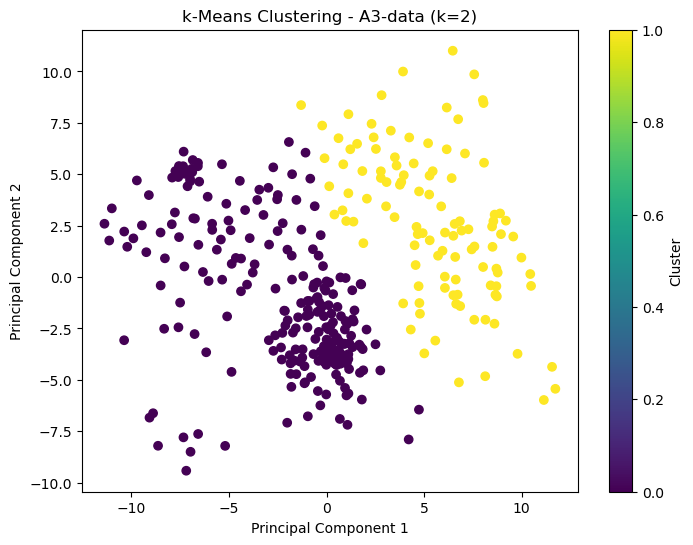

Results for k=3:
Accuracy: 0.2889
Adjusted Rand Index: 0.1900


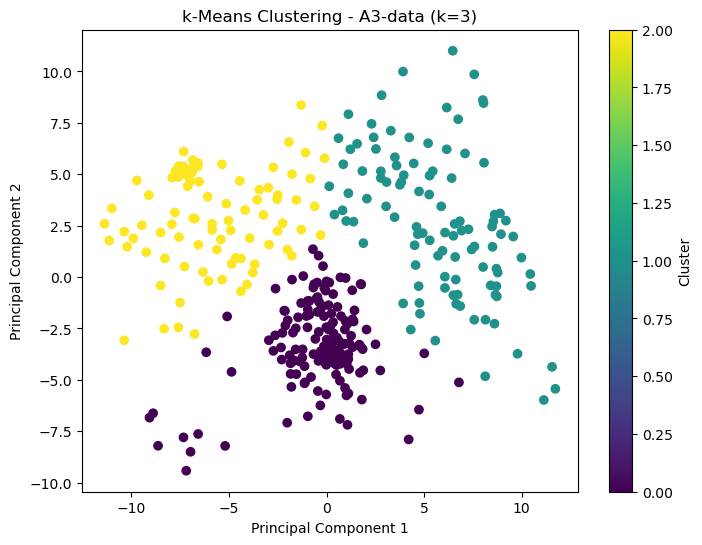

Results for k=4:
Accuracy: 0.4000
Adjusted Rand Index: 0.1344


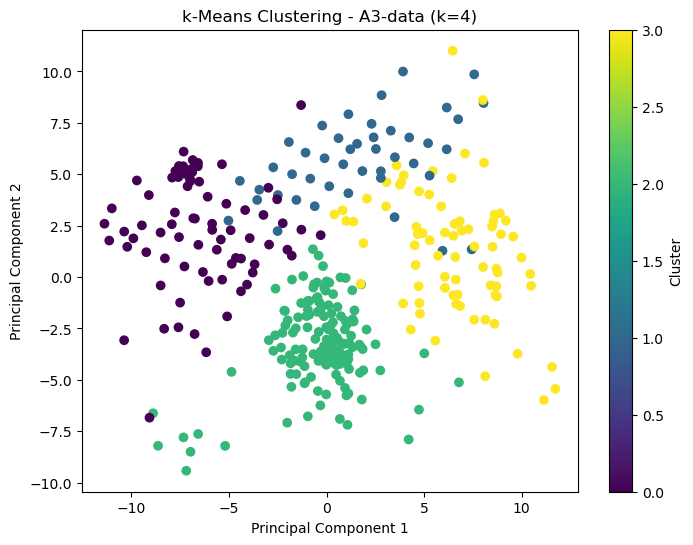

Results for k=5:
Accuracy: 0.1528
Adjusted Rand Index: 0.1005


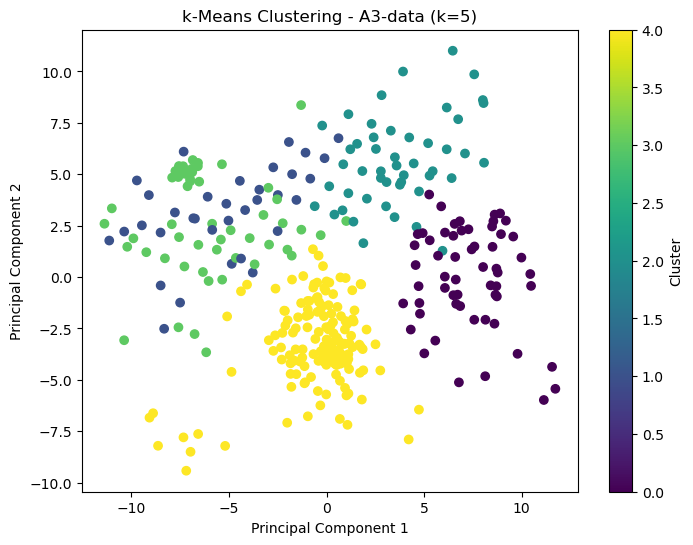

Confusion Matrix for k=5:
[[  0   0   0   0   0]
 [ 58  34  48  36  63]
 [  0   0   0   0 100]
 [  0   0   0  21   0]
 [  0   0   0   0   0]]


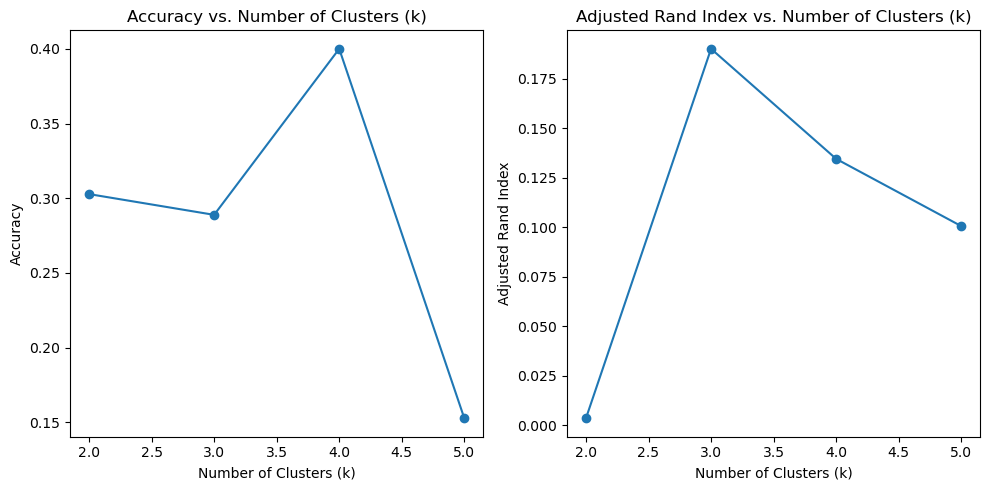

In [38]:
import warnings
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ignore FutureWarnings related to KMeans
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

# Loading data from the file
your_synthetic_data = pd.read_csv('A3-data.txt', delimiter=',')

# Renaming columns to English names and removing the extra 'class' column
your_synthetic_data.columns = ['x', 'y', 'z', 't', 'class']

# Converting categorical values to numerical using One-Hot Encoding
your_synthetic_data = pd.get_dummies(your_synthetic_data, columns=['class'])

# Creating a column 'Class' indicating the class labels
your_synthetic_data['Class'] = your_synthetic_data[['class_1', 'class_2', 'class_3']].idxmax(axis=1).str[-1].astype(int)

# Separating features and the target variable
y = your_synthetic_data['Class']  # Target variable (Class)
X = your_synthetic_data.drop(['class_1', 'class_2', 'class_3', 'Class'], axis=1)  # Features

# Real number of classes (you need to know this value)
real_classes = 5

# Lists to store evaluation results
accuracy_scores = []
adjusted_rand_scores = []

# Applying the k-means method for different k values
for k in range(2, real_classes + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Reducing dimensionality using PCA
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(X)

    # Comparing the obtained clusters with the real classes (if available)
    accuracy = accuracy_score(y, cluster_labels)
    adjusted_rand = adjusted_rand_score(y, cluster_labels)

    print(f"Results for k={k}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Adjusted Rand Index: {adjusted_rand:.4f}")

    accuracy_scores.append(accuracy)
    adjusted_rand_scores.append(adjusted_rand)

    # Visualizing the scatter plot with points colored according to assigned clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(f'k-Means Clustering - A3-data (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

    if k == real_classes:
        # Using a confusion matrix to evaluate the clustering performance when k equals the real classes
        confusion = confusion_matrix(y, cluster_labels)
        print(f"Confusion Matrix for k={k}:\n{confusion}")

# Plotting the accuracy and adjusted Rand Index for different k values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, real_classes + 1), accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(2, real_classes + 1), adjusted_rand_scores, marker='o', linestyle='-')
plt.title('Adjusted Rand Index vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Adjusted Rand Index')

plt.tight_layout()
plt.show()


Results for k=2:
Accuracy: 0.1667
Adjusted Rand Index: 0.1441


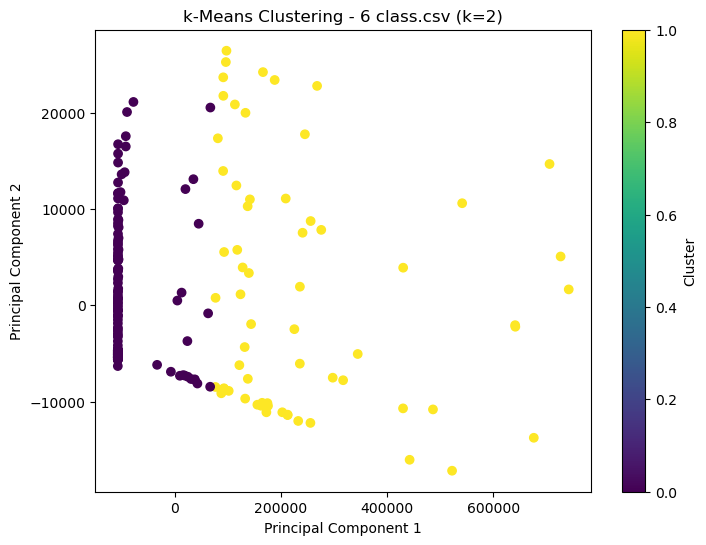

Results for k=3:
Accuracy: 0.1667
Adjusted Rand Index: 0.1929


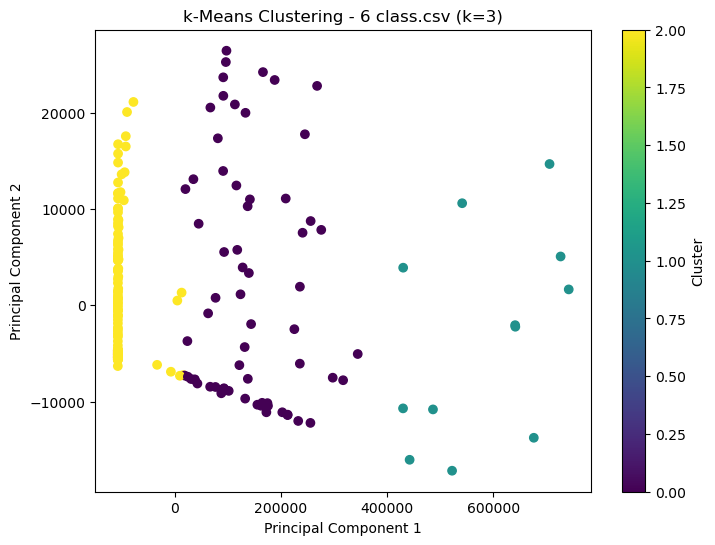

Results for k=4:
Accuracy: 0.1917
Adjusted Rand Index: 0.1939


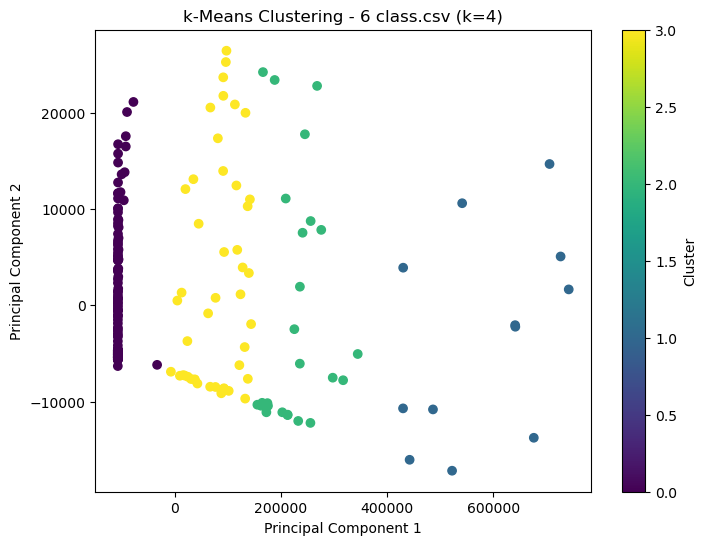

Results for k=5:
Accuracy: 0.2667
Adjusted Rand Index: 0.1919


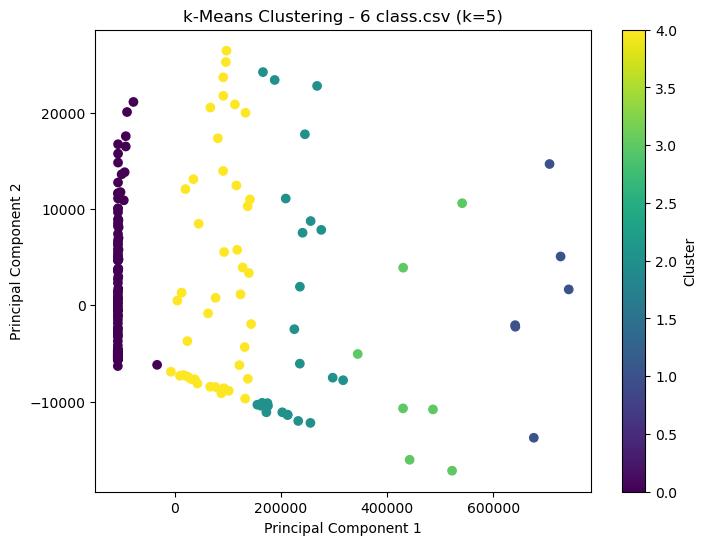

Confusion Matrix for k=5:
[[40  0  0  0  0  0]
 [40  0  0  0  0  0]
 [40  0  0  0  0  0]
 [34  0  0  0  6  0]
 [ 0  3 10  3 24  0]
 [ 1  3 14  4 18  0]]


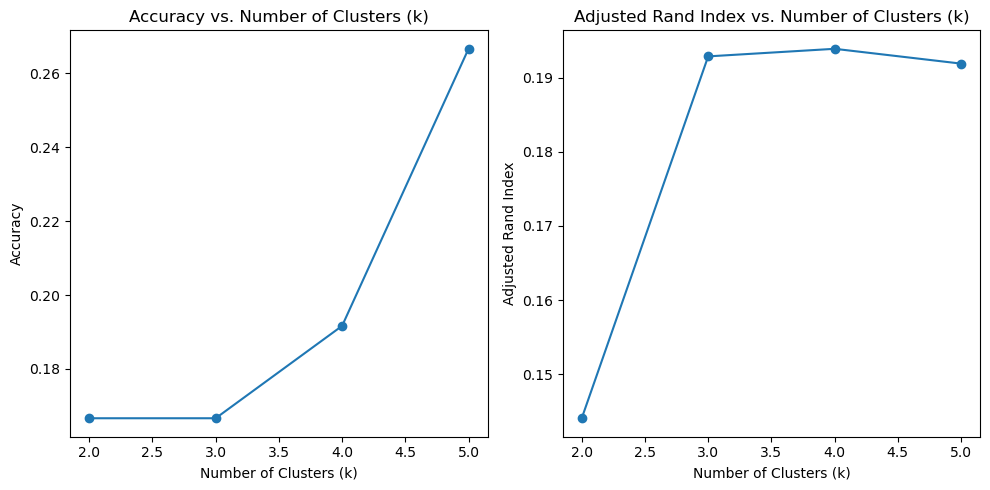

In [45]:
import warnings
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ignore FutureWarnings related to KMeans
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

# Loading data from the file
your_internet_data = pd.read_csv('6 class.csv')

# Renaming columns to English names and removing the extra 'class' column
your_internet_data.columns = ['Temperature', 'Luminosity', 'Radius', 'Absolute magnitude', 'Star type', 'Star color', 'Spectral Class']

# Converting categorical values to numerical using One-Hot Encoding
your_internet_data = pd.get_dummies(your_internet_data, columns=['Star color', 'Spectral Class'])

# Separating features and the target variable
y = your_internet_data['Star type']  # Target variable (Star type)
X = your_internet_data.drop('Star type', axis=1)  # Features

# Real number of classes (you need to know this value)
real_classes = 5

# Lists to store evaluation results
accuracy_scores = []
adjusted_rand_scores = []

# Applying the k-means method for different k values
for k in range(2, real_classes + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Reducing dimensionality using PCA
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(X)

    # Comparing the obtained clusters with the real classes (if available)
    accuracy = accuracy_score(y, cluster_labels)
    adjusted_rand = adjusted_rand_score(y, cluster_labels)

    print(f"Results for k={k}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Adjusted Rand Index: {adjusted_rand:.4f}")

    accuracy_scores.append(accuracy)
    adjusted_rand_scores.append(adjusted_rand)

    # Visualizing the scatter plot with points colored according to assigned clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(f'k-Means Clustering - 6 class.csv (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

    if k == real_classes:
        # Using a confusion matrix to evaluate the clustering performance when k equals the real classes
        confusion = confusion_matrix(y, cluster_labels)
        print(f"Confusion Matrix for k={k}:\n{confusion}")

# Plotting the accuracy and adjusted Rand Index for different k values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, real_classes + 1), accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(2, real_classes + 1), adjusted_rand_scores, marker='o', linestyle='-')
plt.title('Adjusted Rand Index vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Adjusted Rand Index')

plt.tight_layout()
plt.show()


Agglomerative Hierarchical Clustering (AHC)

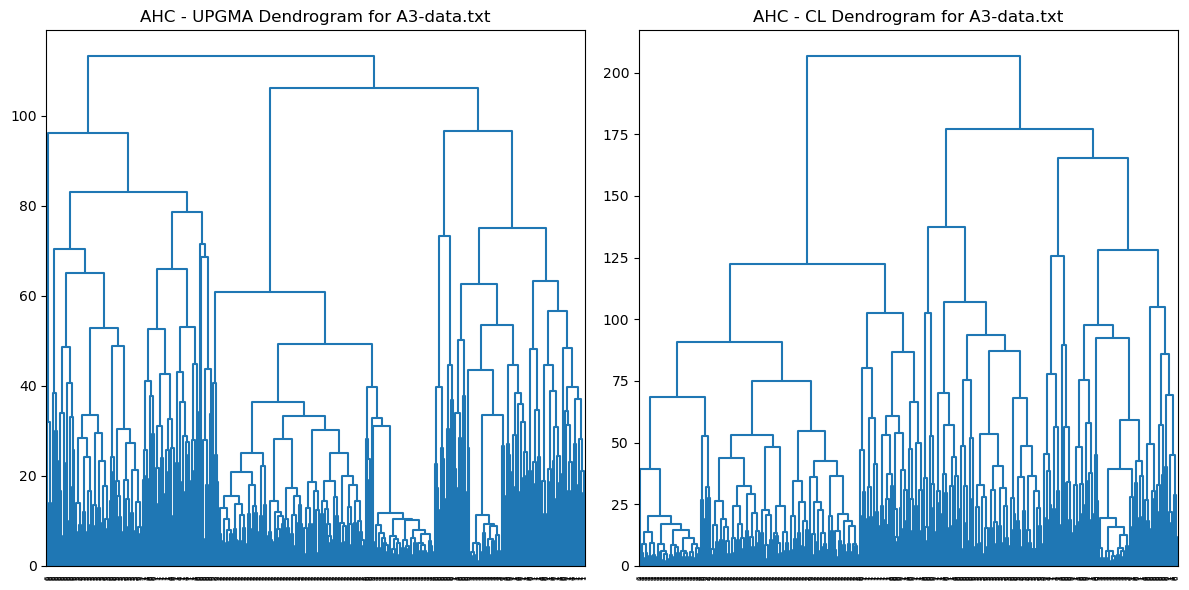

In [148]:
import pandas as pd
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Load your A3-data.txt dataset
your_data = pd.read_csv('A3-data.txt', delimiter=',')

y = your_data['class']  # Modify as needed

# Calculate Euclidean distances
distances_a3data = pairwise_distances(your_data, metric='euclidean')

# Convert to condensed distance matrix
condensed_distances_a3data = pdist(distances_a3data)

# Perform AHC with UPGMA
upgma_a3data = linkage(condensed_distances_a3data, method='average')

# Perform AHC with CL
cl_a3data = linkage(condensed_distances_a3data, method='complete')

# Plot dendrograms for UPGMA and CL
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dendrogram(upgma_a3data, labels=y.values, color_threshold=0.5, leaf_rotation=90)
plt.title('AHC - UPGMA Dendrogram for A3-data.txt')

plt.subplot(1, 2, 2)
dendrogram(cl_a3data, labels=y.values, color_threshold=0.5, leaf_rotation=90)
plt.title('AHC - CL Dendrogram for A3-data.txt')

plt.tight_layout()
plt.show()


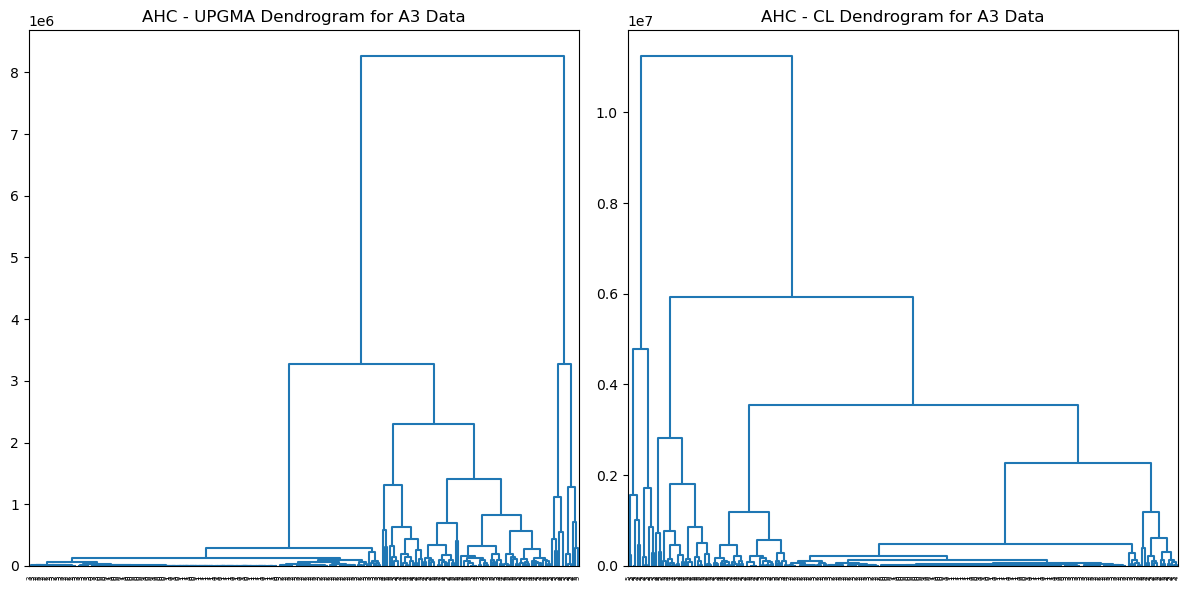

In [146]:
import pandas as pd
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Load your A3 dataset
your_data = pd.read_csv('6 class.csv')  # Replace with your dataset file

# Extract the class labels
y = your_data['Star type']

# Remove the class labels for clustering and exclude categorical columns
X = your_data.drop(['Star type', 'Star color', 'Spectral Class'], axis=1)

# Calculate Euclidean distances
distances_a3data = pairwise_distances(X, metric='euclidean')

# Convert to condensed distance matrix
condensed_distances_a3data = pdist(distances_a3data)

# Perform AHC with UPGMA
upgma_a3data = linkage(condensed_distances_a3data, method='average')

# Perform AHC with CL
cl_a3data = linkage(condensed_distances_a3data, method='complete')

# Plot dendrograms for UPGMA and CL
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dendrogram(upgma_a3data, labels=y.values, color_threshold=0.5, leaf_rotation=90)
plt.title('AHC - UPGMA Dendrogram for 6 class')

plt.subplot(1, 2, 2)
dendrogram(cl_a3data, labels=y.values, color_threshold=0.5, leaf_rotation=90)
plt.title('AHC - CL Dendrogram for 6 class ')

plt.tight_layout()
plt.show()


Self-Organizing Maps (SOM)


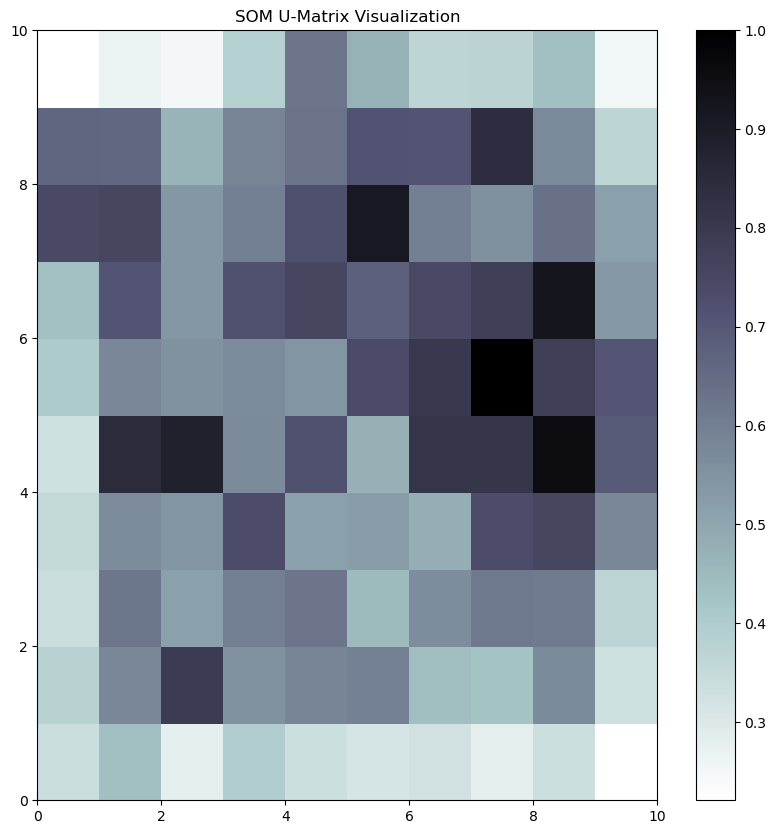

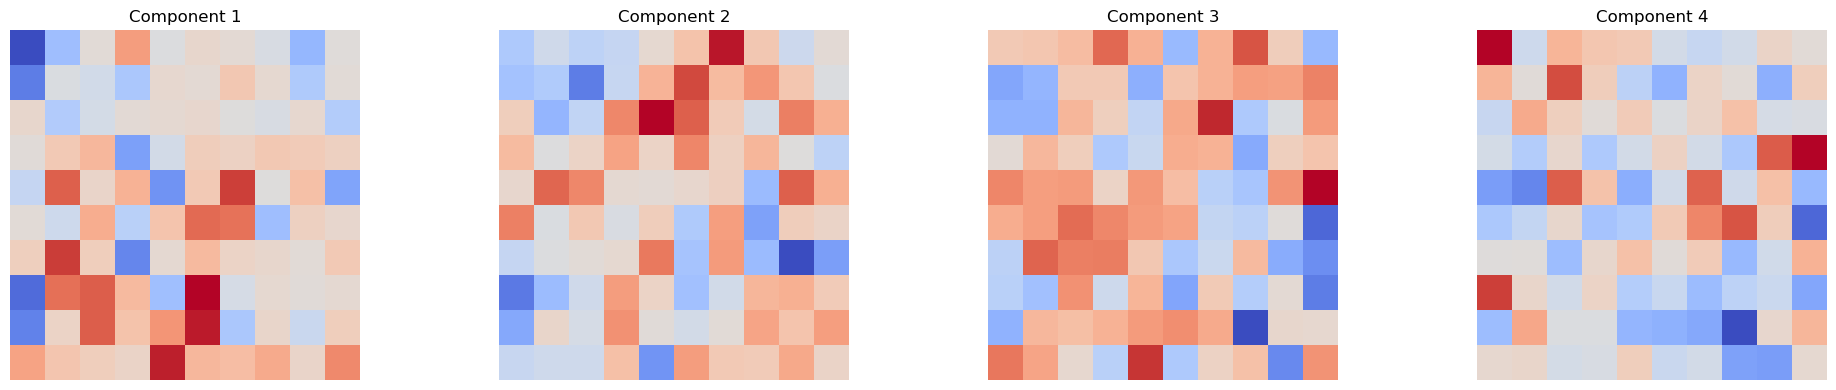

In [136]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your A3 dataset
your_data = pd.read_csv('A3-data.txt', delimiter=',')

# Define the name of your target variable column (replace 'class' with the actual name)
target_variable = 'class'

# Define categorical columns (if any)
categorical_cols = []  # Add the names of categorical columns if they exist in your dataset

# Separate features from the target variable
X = your_data.drop([target_variable], axis=1)
y = your_data[target_variable]

# Define the column transformer to apply one-hot encoding to categorical columns (if any)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Pass through non-categorical columns
)

# Apply preprocessing to the dataset
X_preprocessed = preprocessor.fit_transform(X)

# Scale the data using MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_preprocessed)

# Define the SOM parameters
map_size = (10, 10)  # Adjust the size of the SOM map
num_features = X_scaled.shape[1]
sigma = 1.0
learning_rate = 0.5
random_seed = 42
num_epochs = 100

# Create a SOM instance
som = MiniSom(map_size[0], map_size[1], num_features, sigma=sigma, learning_rate=learning_rate, random_seed=random_seed)

# Initialize the weights and train the SOM
som.random_weights_init(X_scaled)
som.train_batch(X_scaled, num_epochs)

# Creating the U-Matrix
u_matrix = som.distance_map()

# Plot the U-Matrix in a separate figure
plt.figure(figsize=(10, 10))
plt.pcolor(u_matrix.T, cmap='bone_r')
plt.colorbar()
plt.title('SOM U-Matrix Visualization')
plt.show()

# Now plot the component planes for the first 4 components in a 1x4 grid
num_component_planes = 4  # Set the number of components you want to visualize
fig, axs = plt.subplots(1, 4, figsize=(20, 4))  # Create a single row of 4 squares

for i in range(num_component_planes):
    ax = axs[i]

    # Extract the weights for the i-th component plane
    if i < num_features:
        weights = som.get_weights()[:, :, i]
        ax.imshow(weights.T, cmap='coolwarm', interpolation='none')
        ax.set_title(f'Component {i+1}')
        ax.axis('off')

plt.tight_layout()
plt.show()


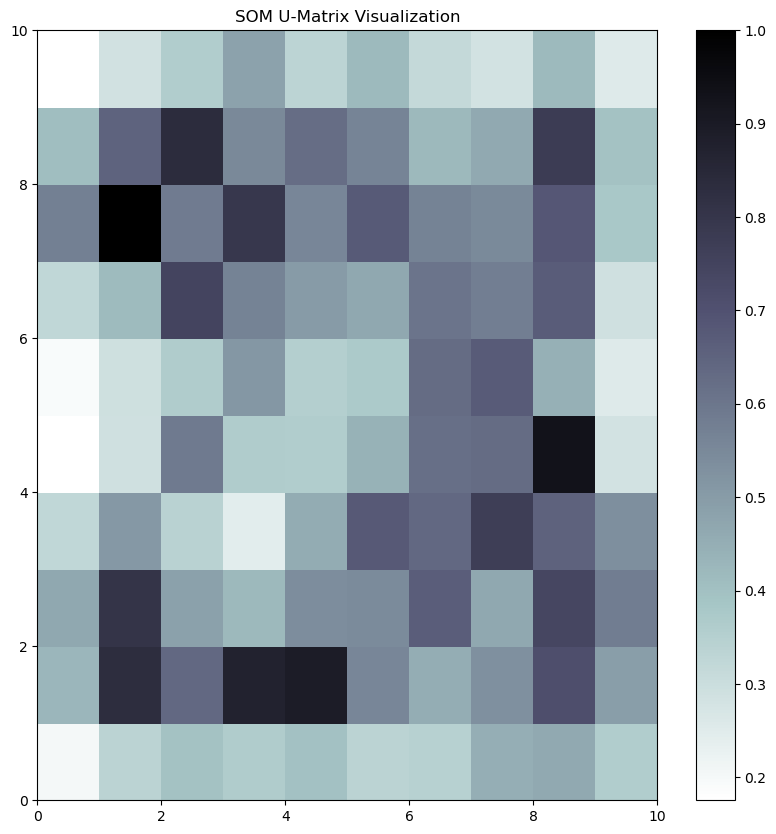

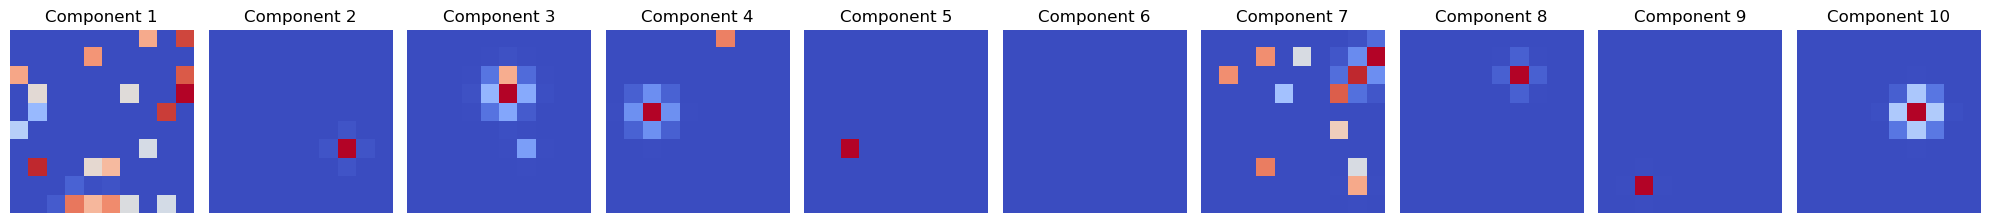

In [144]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading data from the file
your_data = pd.read_csv('6 class.csv')  # Replace with the appropriate dataset file

# Separate features from the target variable if necessary
X = your_data.drop('Star type', axis=1)  # Replace 'target_variable_name' with the actual target variable name

# Define categorical columns
categorical_cols = ['Star color', 'Spectral Class']

# Define the column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Pass through non-categorical columns
)

# Apply preprocessing to the dataset
X_preprocessed = preprocessor.fit_transform(X)

# Scale your data to a specific range using MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_preprocessed)

# Convert X_scaled to a dense numpy array
X_dense = X_scaled.toarray()

# The rest of your code for data preprocessing remains the same...

# Define the SOM parameters
map_size = (10, 10)  # Adjust the size of the SOM map to ensure at least 100 neurons
num_features = X_dense.shape[1]  # The number of features in the dataset

# Create a SOM instance
som = MiniSom(map_size[0], map_size[1], num_features, sigma=sigma, learning_rate=learning_rate, random_seed=random_seed)

# Initialize the weights and train the SOM
som.random_weights_init(X_dense)
som.train_batch(X_dense, num_epochs)

# Creating the U-Matrix
u_matrix = som.distance_map()


# Plot the U-Matrix in a separate figure
plt.figure(figsize=(10, 10))  # You can adjust the figure size as needed
plt.pcolor(u_matrix.T, cmap='bone_r')  # Transpose the u_matrix to match the SOM orientation
plt.colorbar()
plt.title('SOM U-Matrix Visualization')
plt.show()

# Now plot the component planes for the first 10 components in a 1x10 grid
num_component_planes = 10  # Set the number of components you want to visualize (1-10)
fig, axs = plt.subplots(1, num_component_planes, figsize=(20, 4))  # Create a single row of 10 squares

for i in range(num_component_planes):
    ax = axs[i]

    # Extract the weights for the i-th component plane
    weights = som.get_weights()[:, :, i]
    ax.imshow(weights.T, cmap='coolwarm', interpolation='none')  # Transpose to match the SOM orientation
    ax.set_title(f'Component {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()



